In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.iv.base_iv import IVScenario
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds

In [28]:
data = BinaryIV.generate_data_rolling_ate(N_simulations=500)

In [ ]:
binaryIV = BinaryIV('IV Dag', data)

runtimes = binaryIV.run_all_bounding_algorithms(['ATE_2SLS_0.99', 'ATE_2SLS_0.98'])

Running ATE_2SLS_0.99...
ATE_2SLS_0.99 completed in 7.77 seconds.
Running ATE_2SLS_0.98...
ATE_2SLS_0.98 completed in 7.39 seconds.
Algorithm 'ATE_2SLS_0.95' is not recognized.
Algorithm 'ATE_2SLS_0.90' is not recognized.
Total runtime: 15.16 seconds.


Algorithm: ATE_2SLS_0.99
  Fail Rate: 1.00%
  Invalid Rate: 0.61%
  Net Bound Width: 1.1833264563255268
Algorithm: ATE_2SLS_0.98
  Fail Rate: 1.00%
  Invalid Rate: 1.82%
  Net Bound Width: 1.1203917337057903
Algorithm: ATE_2SLS_0.95
  Fail Rate: 1.00%
  Invalid Rate: 4.85%
  Net Bound Width: 1.0166033733564417
Algorithm: ATE_2SLS_0.90
  Fail Rate: 1.00%
  Invalid Rate: 8.89%
  Net Bound Width: 0.9212206054071739


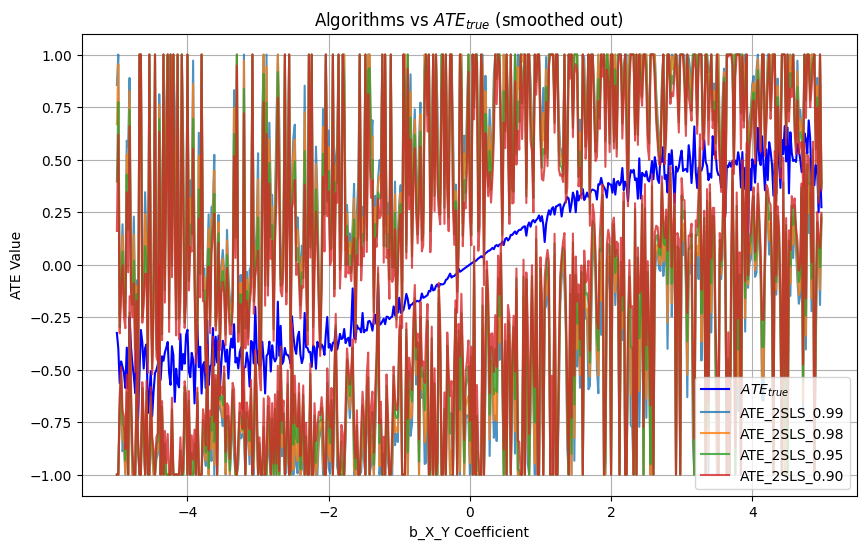

In [30]:
algorithms = list(runtimes['runtimes'].keys())
PlottingUtil.print_bound_statistics(binaryIV.data, algorithms)
PlottingUtil.plot_smoothed_query_vs_bounds(binaryIV.data, 'ATE', algorithms, 1)

In [24]:
invalids = binaryIV.data[binaryIV.data['causaloptim_bound_valid'] == False]
invalIV = BinaryIV('IV Dag', invalids)
invalIV.bound_ate_causaloptim()
invalIV.data

KeyError: 'causaloptim_bound_valid'

In [23]:
binaryIV.data

,seed,intercept_X,intercept_Y,b_Z,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,ATE_2SLS_bound_0.98_lower,ATE_2SLS_bound_0.98_upper,ATE_2SLS_bound_0.98_valid,ATE_2SLS_bound_0.98_width,ATE_2SLS_bound_0.98_failed,ATE_2SLS_bound_0.95_lower,ATE_2SLS_bound_0.95_upper,ATE_2SLS_bound_0.95_valid,ATE_2SLS_bound_0.95_width,ATE_2SLS_bound_0.95_failed,ATE_2SLS_0.98_bound_lower,ATE_2SLS_0.98_bound_upper,ATE_2SLS_0.98_bound_valid,ATE_2SLS_0.98_bound_width,ATE_2SLS_0.98_bound_failed,ATE_2SLS_0.95_bound_lower,ATE_2SLS_0.95_bound_upper,ATE_2SLS_0.95_bound_valid,ATE_2SLS_0.95_bound_width,ATE_2SLS_0.95_bound_failed,ATE_2SLS_0.99_bound_lower,ATE_2SLS_0.99_bound_upper,ATE_2SLS_0.99_bound_valid,ATE_2SLS_0.99_bound_width,ATE_2SLS_0.99_bound_failed,ATE_2SLS_0.9_bound_lower,ATE_2SLS_0.9_bound_upper,ATE_2SLS_0.9_bound_valid,ATE_2SLS_0.9_bound_width,ATE_2SLS_0.9_bound_failed
0,230964,0,0,0.418898,1.569684,-5.000000e+00,1.238534,-6.825817e-01,0.004630,0.018394,0.700975,0.719600,0.906641,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, ...","[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.409187,0.841465,0.745288,0.604813,-1.000000,0.119575,True,1.119575,False,-1.000000,-0.015923,True,0.984077,False,-1.000000,0.119575,True,1.119575,False,-1.000000,-0.015923,True,0.984077,False,-1.000000,0.211840,True,1.211840,False,-1.000000,-0.132459,True,0.867541,False
1,982627,0,0,-0.012747,1.546890,-4.800000e+00,1.257466,-5.414936e-01,0.004493,0.011996,0.553489,0.180542,0.488412,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...","[1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, ...",0.999896,0.705637,0.975438,0.752796,-1.000000,1.000000,True,2.000000,False,-1.000000,1.000000,True,2.000000,False,-1.000000,1.000000,True,2.000000,False,-1.000000,1.000000,True,2.000000,False,-1.000000,1.000000,True,2.000000,False,-1.000000,1.000000,True,2.000000,False
2,553399,0,0,-1.134751,-0.135893,-4.600000e+00,-0.687590,-3.436655e-01,0.003490,0.005462,0.349127,0.928592,0.889949,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, ...",0.511865,0.429759,0.808093,0.835666,-0.854406,0.152787,True,1.007193,False,-0.775093,0.073474,True,0.848567,False,-0.854406,0.152787,True,1.007193,False,-0.775093,0.073474,True,0.848567,False,-0.908412,0.206794,True,1.115206,False,-0.706879,0.005261,True,0.712140,False
3,914514,0,0,-1.146433,0.227262,-4.400000e+00,1.069596,-5.793791e-01,0.007202,0.021363,0.600742,0.413311,0.512223,"[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, ...","[0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, ...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, ...",0.998337,0.977539,0.975438,0.953694,-0.805862,-0.319530,True,0.486332,False,-0.767565,-0.357827,True,0.409738,False,-0.805862,-0.319530,True,0.486332,False,-0.767565,-0.357827,True,0.409738,False,-0.831939,-0.293452,True,0.538487,False,-0.734627,-0.390764,True,0.343863,False
4,617395,0,0,-0.210075,0.129733,-4.200000e+00,0.056067,-4.980842e-01,0.007583,0.015593,0.513677,0.973755,0.808643,"[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.693028,0.163346,0.999988,0.817557,-1.000000,0.442009,True,1.442009,False,-1.000000,0.145743,True,1.145743,False,-1.000000,0.442009,True,1.442009,False,-1.000000,0.145743,True,1.145743,False,-1.000000,0.643746,True,1.643746,False,-1.000000,-0.109062,True,0.890938,False
5,15679,0,0,-1.738131,-1.114768,-4.000000e+00,0.932030,-6.436211e-01,0.012008,0.040373,0.683994,0.8635